In [1]:
import numpy
import numpy.random as random
import mmh3

random.seed(0)

nb_epoch = 300
learn_rate = 0.001
nr_hash_vector = 15

vocab = ['apple', 'strawberry', 'orange', 'juice', 'drink', 'smoothie',
         'eat', 'fruit', 'health', 'wellness', 'steak', 'fries', 'ketchup',
         'burger', 'chips', 'lobster', 'caviar', 'service', 'waiter', 'chef']

true_vectors = numpy.random.uniform(-0.1, 0.1, (len(vocab), 2))
hash_vectors = numpy.random.uniform(-0.1, 0.1, (nr_hash_vector, 2))

examples = list(zip(vocab, true_vectors))
print("before hash_vector", hash_vectors[5]+hash_vectors[13])


loss_, keys=[], {}
for epoch in range(nb_epoch):
    random.shuffle(examples)
    loss=0.
    for word, truth in examples:
        key1 = mmh3.hash(word, 0) % nr_hash_vector
        key2 = mmh3.hash(word, 1) % nr_hash_vector
        keys[word]=[key1, key2]
        hash_vector = hash_vectors[key1] + hash_vectors[key2]

        diff = hash_vector - truth

        hash_vectors[key1] -= learn_rate * diff * 2
        hash_vectors[key2] -= learn_rate * diff * 2
        loss += (diff**2).sum()
    loss_.append(loss)
    #print("Epoch {}: {}".format(epoch, loss))
    
print("true_vector: ", true_vectors[-1])
print("after hash_vector", hash_vectors[5]+hash_vectors[13])

before hash_vector [ 0.078238   -0.09285944]
true_vector:  [0.08874962 0.03636406]
after hash_vector [0.02439573 0.0364369 ]


In [2]:
keys

{'fries': [5, 4],
 'caviar': [3, 0],
 'health': [10, 9],
 'drink': [1, 8],
 'eat': [8, 13],
 'strawberry': [11, 6],
 'ketchup': [2, 2],
 'chef': [5, 13],
 'chips': [0, 5],
 'waiter': [12, 10],
 'service': [2, 2],
 'lobster': [7, 10],
 'wellness': [3, 12],
 'smoothie': [6, 3],
 'fruit': [13, 1],
 'apple': [0, 3],
 'burger': [9, 13],
 'steak': [1, 11],
 'orange': [10, 4],
 'juice': [9, 13]}

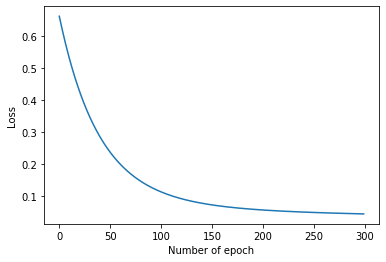

In [3]:
import matplotlib.pyplot as plt
plt.plot(numpy.arange(nb_epoch), loss_)
plt.xlabel("Number of epoch")
plt.ylabel("Loss")
plt.show()